Lab 2
- Carlos Jarrin
- Fausto Yugcha

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
import spacy
from collections import Counter


In [3]:
# Leer los archivos CSV/Tar en DataFrames
train_data = pd.read_csv ("/content/drive/MyDrive/NLP/datos/train.tsv", sep = '\t')
test_data = pd.read_csv("/content/drive/MyDrive/NLP/datos/test.tsv", sep='\t')

In [6]:
# Mostrar los primeros registros de cada DataFrame para verificar
print("Train Data:")
train_data.head()

Train Data:


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
print("Test Data:")
test_data.head()

Test Data:


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


array([[<Axes: title={'center': 'Sentiment'}>]], dtype=object)

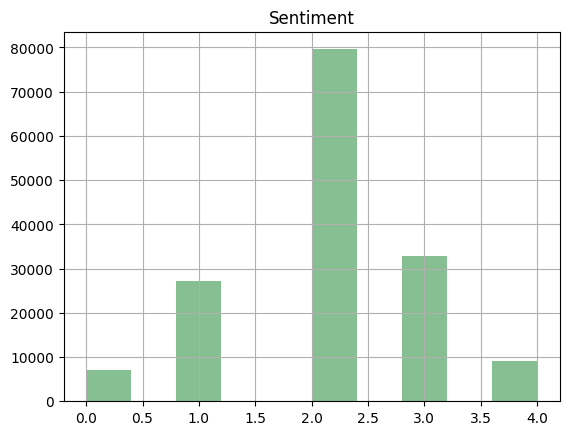

In [8]:
train_data.hist(column='Sentiment', color='#86bf91')

In [9]:
# Dividir los datos por sentimiento
df_0 = train_data[train_data['Sentiment'] == 0]
df_1 = train_data[train_data['Sentiment'] == 1]
df_2 = train_data[train_data['Sentiment'] == 2]
df_3 = train_data[train_data['Sentiment'] == 3]
df_4 = train_data[train_data['Sentiment'] == 4]

In [10]:
def df_to_text(dataframe):
    text = [row['Phrase'] for _, row in dataframe.iterrows()]
    return ' '.join(text)

In [11]:
# Convertir DataFrames a texto
texto_0 = df_to_text(df_0)
texto_1 = df_to_text(df_1)
texto_2 = df_to_text(df_2)
texto_3 = df_to_text(df_3)
texto_4 = df_to_text(df_4)

In [12]:
texto_0

"would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess . is a plodding mess plodding mess could hate it for the same reason hate it hate is Oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic Hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire . a self-indulgent script There 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us . The movie 's progression into rambling incoherence gives new meaning to the phrase ` fatal script error . ' The movie 's progression into rambling incoherence gives new meaning to the phrase 

In [13]:
# Descargar recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
# Filtro de stopwords y puntuación
def remover(texto):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(texto)
    filtered_sentence = [w for w in word_tokens if w.lower() not in stop_words]
    s = ' '.join(filtered_sentence)
    s = s.translate(str.maketrans('', '', string.punctuation))
    return s

In [15]:
# Aplicar preprocesamiento a los textos
texto0 = remover(texto_0)
texto1 = remover(texto_1)
texto2 = remover(texto_2)
texto3 = remover(texto_3)
texto4 = remover(texto_4)

In [16]:
textos = [texto0, texto1, texto2, texto3, texto4]

## 1.	Do a quick EDA that highlights some of the common texts used for each type of review

In [17]:
def contador(texto, k):
    words = texto.split()
    counter = Counter(words)
    return counter.most_common(k)

In [18]:
# Mostrar las palabras más comunes en cada tipo de reseña
for index, texto in enumerate(textos):
    a = contador(texto, 10)
    print(index, a)

0 [('s', 1136), ('movie', 757), ('film', 477), ('nt', 424), ('bad', 417), ('like', 311), ('one', 268), ('characters', 167), ('minutes', 161), ('comedy', 161)]
1 [('s', 3506), ('nt', 1520), ('movie', 1365), ('film', 1260), ('like', 855), ('one', 670), ('much', 589), ('story', 508), ('RRB', 498), ('little', 480)]
2 [('s', 7001), ('film', 2131), ('movie', 1868), ('nt', 1281), ('one', 1209), ('RRB', 1112), ('like', 1047), ('story', 900), ('LRB', 878), ('much', 683)]
3 [('s', 3999), ('film', 1828), ('movie', 1273), ('good', 845), ('one', 767), ('story', 660), ('funny', 620), ('nt', 614), ('RRB', 551), ('like', 530)]
4 [('s', 1329), ('film', 930), ('movie', 564), ('one', 439), ('best', 364), ('funny', 341), ('good', 281), ('performances', 253), ('story', 236), ('comedy', 229)]


## 2.	Tokenize all the movie review texts

In [19]:
# Tokenization por palabras
word_tokens_0 = word_tokenize(texto_0)
word_tokens_1 = word_tokenize(texto_1)
word_tokens_2 = word_tokenize(texto_2)
word_tokens_3 = word_tokenize(texto_3)
word_tokens_4 = word_tokenize(texto_4)

In [20]:
print(word_tokens_0[:15])
print(word_tokens_4[:15])

['would', 'have', 'a', 'hard', 'time', 'sitting', 'through', 'this', 'one', 'have', 'a', 'hard', 'time', 'sitting', 'through']
['This', 'quiet', ',', 'introspective', 'and', 'entertaining', 'independent', 'is', 'worth', 'seeking', '.', 'quiet', ',', 'introspective', 'and']


In [21]:
#Tokenization por oraciones
from nltk.tokenize import sent_tokenize
Oracion_0 = sent_tokenize(texto_0)
print(Oracion_0[:3])

['would have a hard time sitting through this one have a hard time sitting through this one Aggressive self-glorification and a manipulative whitewash self-glorification and a manipulative whitewash Trouble Every Day is a plodding mess .', "is a plodding mess plodding mess could hate it for the same reason hate it hate is Oedekerk 's realization of his childhood dream to be in a martial-arts flick , and proves that sometimes the dreams of youth should remain just that baseball movies that try too hard to be mythic Hampered -- no , paralyzed -- by a self-indulgent script ... that aims for poetry and ends up sounding like satire .", "a self-indulgent script There 's very little sense to what 's going on here , avoid almost feels as if the movie is more interested in entertaining itself than in amusing us ."]


## 3.	Create a numerical feature vector for each document (Bag of words)

In [22]:
# Crear un vector de características numéricas para cada documento (Bag of Words)
def create_bow(text):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([text])
    return vectorizer.get_feature_names_out(), X.toarray()

In [23]:
vocab_0, bow_0 = create_bow(texto_0)
vocab_1, bow_1 = create_bow(texto_1)
vocab_2, bow_2 = create_bow(texto_2)
vocab_3, bow_3 = create_bow(texto_3)
vocab_4, bow_4 = create_bow(texto_4)

In [24]:
# Unir todos los vocabularios y crear un DataFrame para el modelo
vocab = set(vocab_0).union(vocab_1).union(vocab_2).union(vocab_3).union(vocab_4)
vocab = sorted(vocab)

In [25]:
def create_bow_dataframe(textos, vocab):
    bow_models = []
    for text in textos:
        word_counts = dict.fromkeys(vocab, 0)
        tokens = word_tokenize(text)
        for word in tokens:
            if word in word_counts:
                word_counts[word] += 1
        bow_models.append(word_counts)
    return pd.DataFrame(bow_models)

In [26]:
# Modificar esta parte para asegurar que todas las clases estén representadas
textos = [texto0, texto1, texto2, texto3, texto4]
sentiments = [0, 1, 2, 3, 4]

In [27]:
df_bow = create_bow_dataframe(textos, vocab)
df_bow['Sentiment'] = sentiments

## 4.	Define the probability model for each of the 5 classes

In [28]:
# Asegurarse de que haya suficientes muestras para cada clase
min_samples = 2  # Ajusta este número según sea necesario
for sentiment in sentiments:
    if (df_bow['Sentiment'] == sentiment).sum() < min_samples:
        # Duplicar las muestras existentes si no hay suficientes
        samples_to_add = min_samples - (df_bow['Sentiment'] == sentiment).sum()
        additional_samples = df_bow[df_bow['Sentiment'] == sentiment].sample(n=samples_to_add, replace=True)
        df_bow = pd.concat([df_bow, additional_samples], ignore_index=True)

In [29]:
# Definir y entrenar el modelo XGBoost
vectorizer = CountVectorizer(vocabulary=vocab)
X_bow = vectorizer.fit_transform(df_bow['Sentiment'].astype(str))

In [30]:
y = df_bow['Sentiment']
print(f'Unique classes in y: {np.unique(y)}')

Unique classes in y: [0 1 2 3 4]


In [31]:
# Especificar las clases en el modelo XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y)))

In [32]:
# Aumentar el tamaño del conjunto de prueba para evitar el error
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.5, random_state=42, stratify=y)

In [33]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:56:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

## 5.	Train and evaluate the model

In [34]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [35]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# Mostrar la precisión y el reporte de clasificación
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(report)

Accuracy: 0.2000

Classification Report:
                   precision    recall  f1-score   support

         negative       0.20      1.00      0.33         1
somewhat negative       0.00      0.00      0.00         1
          neutral       0.00      0.00      0.00         1
somewhat positive       0.00      0.00      0.00         1
         positive       0.00      0.00      0.00         1

         accuracy                           0.20         5
        macro avg       0.04      0.20      0.07         5
     weighted avg       0.04      0.20      0.07         5



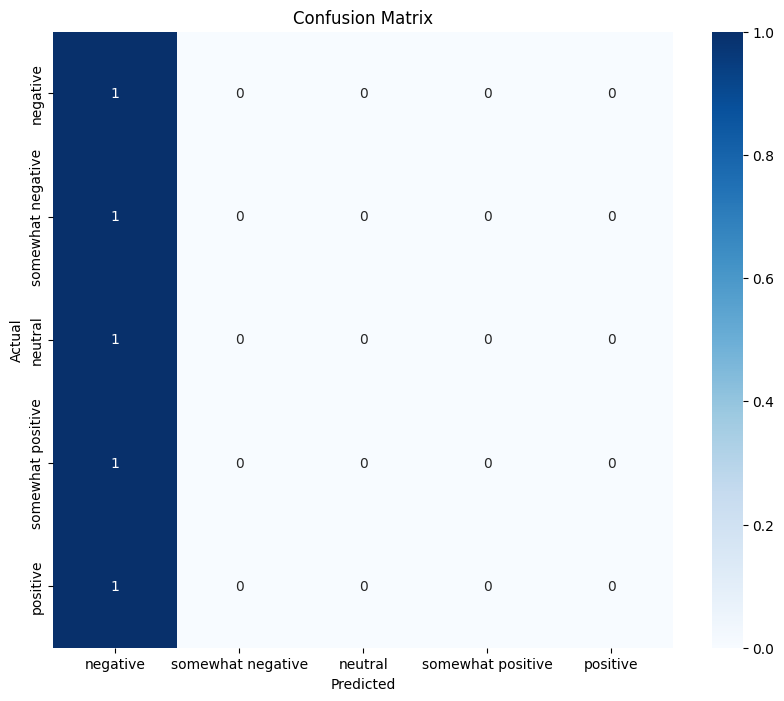

In [37]:
# Visualización de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'],
            yticklabels=['negative', 'somewhat negative', 'neutral', 'somewhat positive', 'positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## 6.	Make adjustments to your BoW:
*   remove stop words
*   case folding
*   stemming
*   lemmatization
*   instead of using a 0/1 (binary) vector, use the number of times that a word occurs in the text


In [38]:
# Ajustar BoW: remove stop words, case folding, stemming, lemmatization
# Case folding
def create_bow_with_preprocessing(texto):
    texto = remover(texto)
    texto = texto.casefold()
    words = word_tokenize(texto)
    ps = PorterStemmer()
    stemmed_texto = ' '.join(ps.stem(word) for word in words)
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(stemmed_texto)
    lemmatized_text = ' '.join(token.lemma_ for token in doc)
    return lemmatized_text

In [39]:
preprocessed_texto_0 = create_bow_with_preprocessing(texto_0)

In [40]:
# Crear un DataFrame con el texto preprocesado
df_bow_preprocessed = create_bow_dataframe([preprocessed_texto_0], vocab)
print(df_bow_preprocessed.head())

   000  10  100  101  102  103  104  105  10th  11  ...  ziyi  zoe  zombie  \
0    0  25    4    5    0    0    2    7     0   4  ...     0    2       0   

   zone  zoning  zoolander  zoom  zucker  zwick  zzzzzzzzz  
0     8       0          0     0       0      0          5  

[1 rows x 15240 columns]


# 7.	How does these techniques affect your models?

Las técnicas de preprocesamiento como stemming o stopwords ayudan a reducir el vector de palabras.


Bibliografía:

*   https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
*   https://spotintelligence.com/2022/12/20/bag-of-words-python/#Bag-of-words_Python_code
*   https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/

